In [5]:
import pandas as pd
import numpy as np 

import statsmodels.api as sm 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report 


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [16]:
df=pd.read_csv("./diabetes.csv")
y=df["Outcome"]
X=df.drop(['Outcome'],axis=1)
X_train, X_test,y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=0.30,
                                                 random_state=42)

In [19]:
#Model ve tahmin

In [21]:
rf_model=RandomForestClassifier().fit(X_train,y_train)

In [23]:
rf_model

RandomForestClassifier()

In [31]:
y_pred=rf_model.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred)

0.7619047619047619

In [ ]:
#model tuning

In [36]:
rf=RandomForestClassifier()

In [38]:
rf_params={"n_estimators":[100,200,500,1000],
           "max_features":[3,5,7,8],
          "min_samples_split":[2,5,10,20]}

In [40]:
rf_cv_model=GridSearchCV(rf,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [41]:
rf_cv_model.best_params_

{'max_features': 7, 'min_samples_split': 5, 'n_estimators': 200}

In [42]:
#final model

In [46]:
rf_tuned=RandomForestClassifier(max_features=8,min_samples_split=5,n_estimators=500).fit(X_train,y_train)

In [48]:
y_pred=rf_tuned.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred)

0.7532467532467533

In [52]:
#degisken önem düzeyleri

In [58]:
rf_tuned.feature_importances_

array([0.05001209, 0.37370214, 0.07360237, 0.0468244 , 0.04930036,
       0.158272  , 0.11434892, 0.13393772])

In [60]:
rf_tuned

RandomForestClassifier(max_features=8, min_samples_split=5, n_estimators=500)

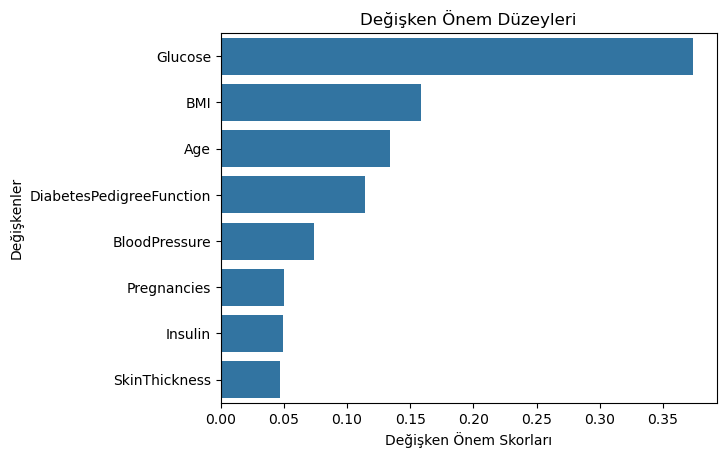

In [56]:
feature_imp = pd.Series(rf_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()